In [6]:
import numpy as np
from PIL import Image
import cv2
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [7]:
# Load training data
#the running of this seperate file needs the revision of relative path

train_label_path = './Datasets/celeba/labels.csv'
train_img_path = './Datasets/celeba/img/'
test_label_path = './Datasets/celeba_test/labels.csv'
test_img_path = './Datasets/celeba_test/img/'

dataset = pd.read_csv(train_label_path, sep = "\t")  # read csv file
dataset.loc[dataset['smiling'] == -1, 'smiling'] = 0 
y_train = dataset['smiling']
img_name1 = dataset['img_name']

def loadImage(path):
    img = Image.open(path)
    img = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2BGR)
    median = cv2.resize(img, (45, 55))
    img_resize = Image.fromarray(cv2.cvtColor(median,cv2.COLOR_BGR2RGB))
    img = img_resize.convert("L")
    data = img.getdata()
    return data

x_train = []
for name in img_name1:
    img_path = train_img_path + name # get path
    img = loadImage(img_path)
    x_train.append(img)  # add pic to x_train
    
# Load test data
data_test = pd.read_csv(test_label_path, sep = "\t")  # read csv file
data_test.loc[data_test['smiling'] == -1, 'smiling'] = 0 
y_test = data_test['smiling']
img_name2 = data_test['img_name']

x_test = []
for name in img_name2:
    img_path = test_img_path + name  # get path
    img = loadImage(img_path)
    x_test.append(img)  # add pic to x_test
    
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print("Dataset prepared")

Dataset prepared


In [8]:
# GridSearchCV
'''
param_test1 = {'kernel': ['rbf'],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
gsearch1 = GridSearchCV(estimator = SVC(), 
                       param_grid = param_test1,cv=5)
gsearch1.fit(x_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
'''

({'mean_fit_time': array([19.92401991, 19.48521791]),
  'std_fit_time': array([0.9448668 , 0.47188883]),
  'mean_score_time': array([8.91318102, 8.40225792]),
  'std_score_time': array([0.4967442 , 0.20752864]),
  'param_C': masked_array(data=[0.001, 0.01],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'param_kernel': masked_array(data=['rbf', 'rbf'],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'params': [{'C': 0.001, 'kernel': 'rbf'}, {'C': 0.01, 'kernel': 'rbf'}],
  'split0_test_score': array([0.661, 0.661]),
  'split1_test_score': array([0.665, 0.665]),
  'split2_test_score': array([0.648, 0.648]),
  'split3_test_score': array([0.655, 0.655]),
  'split4_test_score': array([0.63, 0.63]),
  'mean_test_score': array([0.6518, 0.6518]),
  'std_test_score': array([0.01231909, 0.01231909]),
  'rank_test_score': array([1, 1])},
 {'C': 0.001, 'kernel': 'rbf'},
 0.6518)

In [3]:
model = SVC(kernel='rbf', C=1, decision_function_shape='ovo')
# Cross-validation
'''
for q in range(0,10,1):
    test_size=[0.8,0.6,0.4,0.2,0.05]
    size=test_size[q]
    print("test_size = ",size)
    for p in range(3):
        x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=size)
        model.fit(x_train_split,y_train_split)
        y_pred = model.predict(x_val)
        y_pred_training = model.predict(x_train_split)
        print('Accuracy Score on train data: ', accuracy_score(y_true=y_train_split, y_pred=y_pred_training))
        print('Accuracy Score on test data: ', accuracy_score(y_true=y_val, y_pred=y_pred))
'''

'\nfor q in range(0,10,1):\n    test_size=[0.8,0.6,0.4,0.2,0.05]\n    size=test_size[q]\n    print("test_size = ",size)\n    for p in range(3):\n        x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=size)\n        model.fit(x_train_split,y_train_split)\n        y_pred = model.predict(x_val)\n        y_pred_training = model.predict(x_train_split)\n        print(\'Accuracy Score on train data: \', accuracy_score(y_true=y_train_split, y_pred=y_pred_training))\n        print(\'Accuracy Score on test data: \', accuracy_score(y_true=y_val, y_pred=y_pred))\n'

In [4]:
# Test
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
#Use accuracy metric from sklearn.metrics library
#print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=model.predict(x_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test,y_pred))#text report showing the main classification metrics


Accuracy Score on test data:  0.877
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       500
           1       0.89      0.86      0.88       500

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



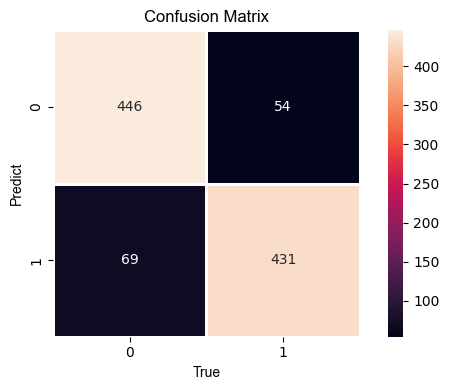

In [5]:
# Results analysis
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
fig, ax = plt.subplots(figsize=(6,4)) 
ax = sns.heatmap(df_cm, 
                annot=True, 
                fmt=".20g", 
                linewidths=2, 
                square=True
                )

ax.set_xlabel('True', family='Arial')
ax.set_ylabel('Predict', family='Arial')
ax.set_title('Confusion Matrix', family='Arial')
plt.tight_layout()
plt.savefig('A2_SVM.png', dpi=300)
